The project involves conducting exploratory data analysis (EDA) on financial market data obtained from the Binance API. Using Python and Pandas, the goal is to analyze and visualize key metrics such as price trends, trading volumes, and other relevant indicators, providing insights into the historical performance of assets traded on the Binance exchange. This work aims to enhance understanding and decision-making for traders, investors, and analysts by leveraging data-driven insights derived from the cryptocurrency market.

# Install Dependencies

In [1]:
!pip install python-binance mplfinance

In [69]:
!pip install bokeh

In [73]:
!pip install altair cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=78ed712c46e9bf07c795b711894d1c8d61c2791485bb2ed8bd329bf70b8d3703
  Stored in directory: c:\users\anish\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


## API Keys (Generate your own API Keys from Binance)

In [2]:
apiKey = 'S9qqbQoL7OYrDi6CqVKmIhitVItgYwbi6TIVtf3Pni2dM4eHt1wTjM4OZLgW1yt5'
secretKey = '2bGRDM3SQNLWDlhXvsQcD8rbNxH3Aolx3SbZn2lvtniNDAVMIPxmPFMYYZoAaeVF'

### Importing Dependencies

In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
client = Client(apiKey,secretKey)

### Grabbing Tickers

In [4]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.05472000'},
 {'symbol': 'LTCBTC', 'price': '0.00215700'},
 {'symbol': 'BNBBTC', 'price': '0.00717100'},
 {'symbol': 'NEOBTC', 'price': '0.00024480'},
 {'symbol': 'QTUMETH', 'price': '0.00142600'},
 {'symbol': 'EOSETH', 'price': '0.00033700'},
 {'symbol': 'SNTETH', 'price': '0.00001610'},
 {'symbol': 'BNTETH', 'price': '0.00032950'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00009000'},
 {'symbol': 'BNBETH', 'price': '0.13100000'},
 {'symbol': 'BTCUSDT', 'price': '30425.39000000'},
 {'symbol': 'ETHUSDT', 'price': '1665.32000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000490'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [5]:
tickers[0]['price']

'0.05472000'

In [6]:
tickerDf = pd.DataFrame(tickers)

In [7]:
tickerDf.head(5)

,symbol,price
0,ETHBTC,0.05472000
1,LTCBTC,0.00215700
2,BNBBTC,0.00717100
3,NEOBTC,0.00024480
4,QTUMETH,0.00142600


In [8]:
tickerDf.set_index('symbol',inplace=True)

In [9]:
tickerDf.head(5)

,price
symbol,
ETHBTC,0.05472000
LTCBTC,0.00215700
BNBBTC,0.00717100
NEOBTC,0.00024480
QTUMETH,0.00142600


In [10]:
tickerDf.loc['ETHBTC']

price    0.05472000
Name: ETHBTC, dtype: object

In [11]:
tickerDf.loc['BNBBTC']['price']

'0.00717100'

### Get Depth

`get_order_book`

The _get_order_book_ function allows you to retrieve market depth
data trom **Binance**. You can pass through a ticker code as well as the limit for the number of tickers you want returned.

#### Meaning :
`get:` Indicates that the function is used for retrieval or fetching data.
`order_book:` Refers to a record of buy and sell orders for a particular asset or financial instrument.

The order book is a real-time, continuously updated list of buy and sell orders in the market. It typically includes information such as the price at which traders are willing to buy or sell, along with the corresponding quantities.

In [12]:
depthETH = client.get_order_book(symbol='ETHBTC')
depthETH

{'lastUpdateId': 6870810734,
 'bids': [['0.05472000', '75.20540000'],
  ['0.05471000', '38.88240000'],
  ['0.05470000', '27.14780000'],
  ['0.05469000', '18.82090000'],
  ['0.05468000', '18.53100000'],
  ['0.05467000', '60.28130000'],
  ['0.05466000', '33.47470000'],
  ['0.05465000', '32.37250000'],
  ['0.05464000', '15.10590000'],
  ['0.05463000', '43.32170000'],
  ['0.05462000', '18.55170000'],
  ['0.05461000', '96.35670000'],
  ['0.05460000', '60.19110000'],
  ['0.05459000', '0.46010000'],
  ['0.05458000', '124.52960000'],
  ['0.05456000', '17.70410000'],
  ['0.05455000', '98.57750000'],
  ['0.05454000', '3.19850000'],
  ['0.05453000', '0.72440000'],
  ['0.05452000', '2.25570000'],
  ['0.05451000', '188.59190000'],
  ['0.05450000', '32.38920000'],
  ['0.05449000', '0.99640000'],
  ['0.05448000', '0.73350000'],
  ['0.05447000', '6.89920000'],
  ['0.05446000', '2.35760000'],
  ['0.05445000', '1.83930000'],
  ['0.05444000', '3.73310000'],
  ['0.05443000', '2.74780000'],
  ['0.05442000'

In [13]:
depthBTC = client.get_order_book(symbol='BTCUSDT')
depthBTC

{'lastUpdateId': 39739397261,
 'bids': [['30422.21000000', '6.76279000'],
  ['30422.09000000', '0.45000000'],
  ['30421.94000000', '0.11045000'],
  ['30421.93000000', '0.20000000'],
  ['30421.25000000', '0.20000000'],
  ['30421.05000000', '0.32340000'],
  ['30420.58000000', '0.00146000'],
  ['30420.57000000', '1.57953000'],
  ['30420.56000000', '0.00165000'],
  ['30420.44000000', '0.00033000'],
  ['30420.32000000', '0.00033000'],
  ['30420.24000000', '0.00146000'],
  ['30420.20000000', '0.00033000'],
  ['30420.08000000', '0.00033000'],
  ['30419.96000000', '0.00033000'],
  ['30419.90000000', '0.00146000'],
  ['30419.84000000', '0.00093000'],
  ['30419.80000000', '0.02500000'],
  ['30419.56000000', '0.00146000'],
  ['30419.33000000', '0.45000000'],
  ['30419.24000000', '0.00033000'],
  ['30419.22000000', '0.00146000'],
  ['30419.12000000', '0.00033000'],
  ['30419.05000000', '0.45000000'],
  ['30419.00000000', '0.00033000'],
  ['30418.94000000', '0.45000000'],
  ['30418.91000000', '0.00

In [14]:
depthDf = pd.DataFrame(depthBTC['bids'])
depthDf.columns = ['Price','Volume']
depthDf.head()

,Price,Volume
0,30422.21000000,6.76279000
1,30422.09000000,0.45000000
2,30421.94000000,0.11045000
3,30421.93000000,0.20000000
4,30421.25000000,0.20000000


## Get Historical Data and Data Transformation

- **Open Time:** 1503187200000 (milliseconds since Unix epoch)
- **Open Price:** 4120.98000000
- **High Price:** 4211.08000000
- **Low Price:** 4032.62000000
- **Close Price:** 4086.29000000
- **Volume:** 467.08302200
- **Close Time:** 1503273599999 (milliseconds since Unix epoch)
- **Quote Asset Volume:** 1930364.39032646
- **Number of Trades:** 2321
- **Taker Buy Base Asset Volume:** 376.79594700
- **Taker Buy Quote Asset Volume:** 1557401.33373730
- **Ignore:** 0

In [15]:
client.get_historical_klines??

In [16]:
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, "1 Jan 2011")

In [17]:
historical

[[1502928000000,
  '4261.48000000',
  '4485.39000000',
  '4200.74000000',
  '4285.08000000',
  '795.15037700',
  1503014399999,
  '3454770.05073206',
  3427,
  '616.24854100',
  '2678216.40060401',
  '0'],
 [1503014400000,
  '4285.08000000',
  '4371.52000000',
  '3938.77000000',
  '4108.37000000',
  '1199.88826400',
  1503100799999,
  '5086958.30617151',
  5233,
  '972.86871000',
  '4129123.31651808',
  '0'],
 [1503100800000,
  '4108.37000000',
  '4184.69000000',
  '3850.00000000',
  '4139.98000000',
  '381.30976300',
  1503187199999,
  '1549483.73542151',
  2153,
  '274.33604200',
  '1118001.87008735',
  '0'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '4032.62000000',
  '4086.29000000',
  '467.08302200',
  1503273599999,
  '1930364.39032646',
  2321,
  '376.79594700',
  '1557401.33373730',
  '0'],
 [1503273600000,
  '4069.13000000',
  '4119.62000000',
  '3911.79000000',
  '4016.00000000',
  '691.74306000',
  1503359999999,
  '2797231.71402728',
  3972,
  '557.35610700',

In [18]:
historicalDf = pd.DataFrame(historical)
historicalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [19]:
historicalDf.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 
                        'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 
                        'Taker Buy Base Volume', 'Taker Buy Quote Volume', 'Ignore']
historicalDf.head(5)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [20]:
historicalDf.dtypes

Open Time                  int64
Open                      object
High                      object
Low                       object
Close                     object
Volume                    object
Close Time                 int64
Quote Asset Volume        object
Number of Trades           int64
Taker Buy Base Volume     object
Taker Buy Quote Volume    object
Ignore                    object
dtype: object

**What we Have Earlier : `9` Object Type or String Type Data**

|Column Name              |Data Type  |
|:------------------------|:----------|
| Open Time               | int64     |
| Open                    | object    |
| High                    | object    |
| Low                     | object    |
| Close                   | object    |
| Volume                  | object    |
| Close Time              | int64     |
| Quote Asset Volume      | object    |
| Number of Trades        | int64     |
| Taker Buy Base Volume   | object    |
| Taker Buy Quote Volume  | object    |
| Ignore                  | object    |

## Data Transformation

#### Conversion of Date Type

In [23]:
historicalDf['Open Time'] = pd.to_datetime(historicalDf['Open Time']/1000, unit ='s')
historicalDf['Close Time'] = pd.to_datetime(historicalDf['Close Time']/1000, unit ='s')

In [28]:
print(historicalDf['Open Time'].dtypes)
print(historicalDf['Close Time'].dtypes)

datetime64[ns]
datetime64[ns]


In [25]:
historicalDf.head(5)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore
0,2017-08-17,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,2017-08-17 23:59:59.999000064,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,2017-08-18,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,2017-08-18 23:59:59.999000064,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,2017-08-19,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,2017-08-19 23:59:59.999000064,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,2017-08-20,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,2017-08-20 23:59:59.999000064,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,2017-08-21,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,2017-08-21 23:59:59.999000064,2797231.71402728,3972,557.35610700,2255662.55315837,0


#### Transforming the Numeric Columns

In [31]:
# These columns represent that their Datatype needs to be altered
numericCols = ['Open','High','Low','Close','Volume',
              'Quote Asset Volume','Taker Buy Base Volume',
              'Taker Buy Quote Volume']

In [33]:
historicalDf[numericCols] = historicalDf[numericCols].apply(pd.to_numeric,axis=1)

### After Transformation of All Datatypes

In [34]:
historicalDf.dtypes

Open Time                 datetime64[ns]
Open                             float64
High                             float64
Low                              float64
Close                            float64
Volume                           float64
Close Time                datetime64[ns]
Quote Asset Volume               float64
Number of Trades                   int64
Taker Buy Base Volume            float64
Taker Buy Quote Volume           float64
Ignore                            object
dtype: object

In [36]:
historicalDf.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03,2.259000e+03,2259.000000,2.259000e+03
mean,20340.619340,20873.919898,19744.789057,20352.266375,74319.863285,1.629978e+09,1.439306e+06,36962.967892,8.073687e+08
std,15821.448021,16241.707559,15339.185177,15819.307508,85633.003503,2.080573e+09,2.023889e+06,42600.789926,1.033468e+09
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05
25%,7795.565000,8046.120000,7562.545000,7806.635000,30088.654694,2.743521e+08,2.887870e+05,15191.804059,1.391320e+08
50%,13266.400000,13818.550000,12535.000000,13300.000000,46664.785325,7.221508e+08,7.407410e+05,23270.117230,3.507413e+08
75%,29437.995000,30080.640000,29032.120000,29450.405000,78571.101932,2.318319e+09,1.561206e+06,38838.188526,1.154038e+09
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09


In [42]:
historicalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Open Time               2259 non-null   datetime64[ns]
 1   Open                    2259 non-null   float64       
 2   High                    2259 non-null   float64       
 3   Low                     2259 non-null   float64       
 4   Close                   2259 non-null   float64       
 5   Volume                  2259 non-null   float64       
 6   Close Time              2259 non-null   datetime64[ns]
 7   Quote Asset Volume      2259 non-null   float64       
 8   Number of Trades        2259 non-null   int64         
 9   Taker Buy Base Volume   2259 non-null   float64       
 10  Taker Buy Quote Volume  2259 non-null   float64       
 11  Ignore                  2259 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), obje

## Vizualisation using MPLFinance

In [43]:
import mplfinance as mpf

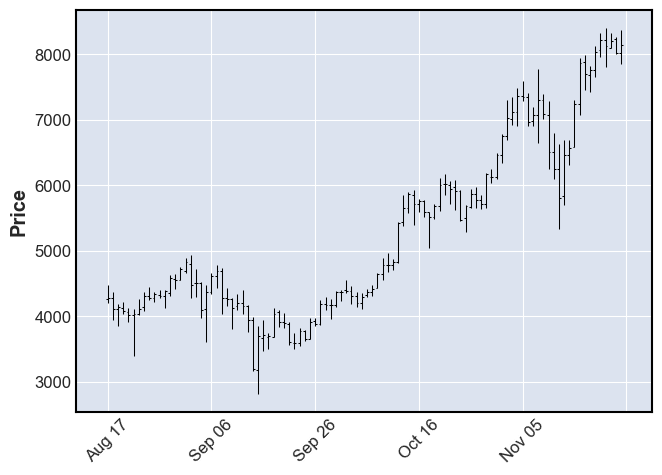

In [51]:
mpf.plot(historicalDf.set_index('Close Time').head(100))

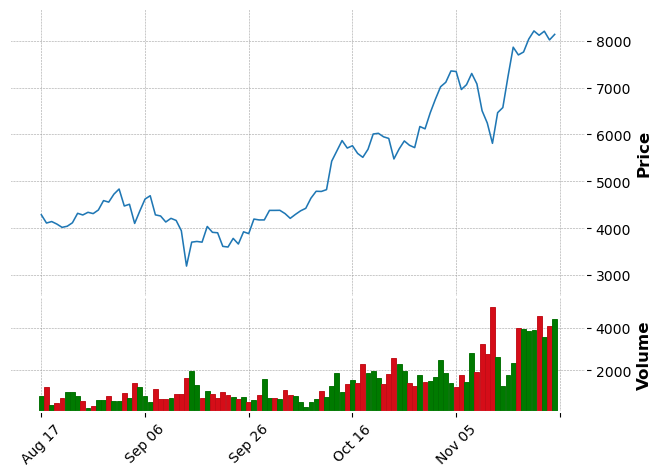

In [65]:
mpf.plot(historicalDf.set_index('Open Time').head(100),
        type='line', style='charles',volume=True)

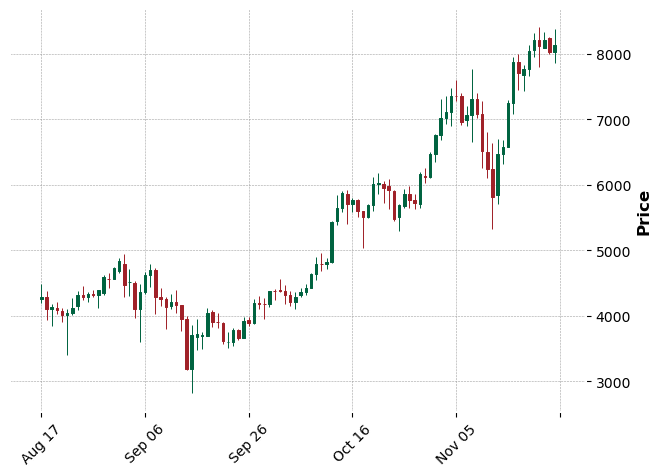

In [61]:
mpf.plot(historicalDf.set_index('Open Time').head(100),
        type='candle', style='charles')

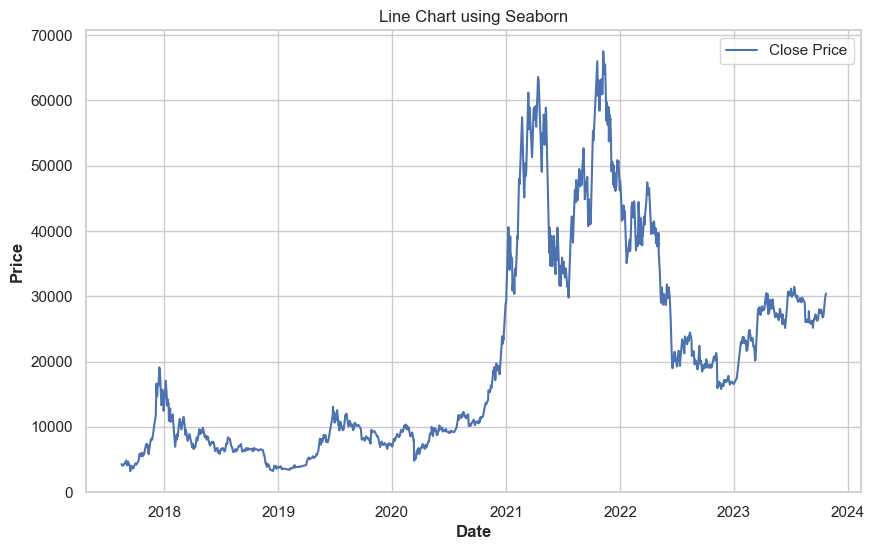

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Open Time', y='Close', data=historicalDf, label='Close Price')
plt.title('Line Chart using Seaborn')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [72]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=historicalDf['Open Time'],
                open=historicalDf['Open'],
                high=historicalDf['High'],
                low=historicalDf['Low'],
                close=historicalDf['Close'])])

fig.update_layout(title='Candlestick Chart using Plotly',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

In [74]:
import altair as alt
# Assuming historicalDf is your DataFrame

alt.Chart(historicalDf).mark_line().encode(
    x='Open Time:T',
    y='Close:Q',
    tooltip=['Open Time:T', 'Close:Q']
).properties(
    title='Line Chart using Altair',
    width=600
).interactive()

alt.Chart(...)

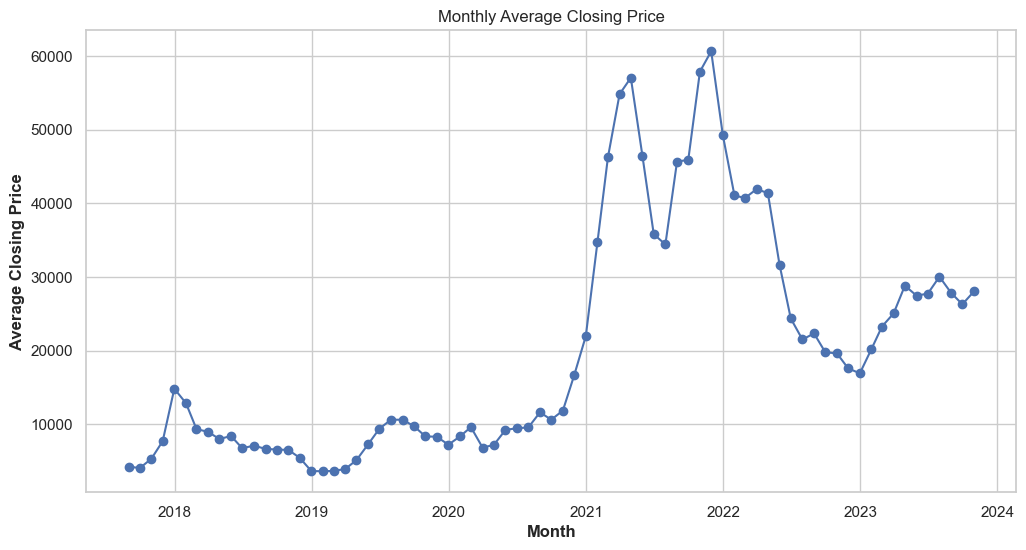

In [78]:
import matplotlib.pyplot as plt

# Assuming 'Open Time' is not the index and is in datetime format
historicalDf['Open Time'] = pd.to_datetime(historicalDf['Open Time'])
historicalDf.set_index('Open Time', inplace=True)

# Resample on a monthly basis and calculate the mean
monthly_prices = historicalDf.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_prices['Close'], marker='o')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()

In [80]:
import plotly.express as px

# Assuming 'Open Time' is datetime and it's the index of DataFrame
monthly_prices = historicalDf.resample('M').mean().reset_index()

fig = px.scatter(monthly_prices, x='Open Time', y='Close', trendline='ols', title='Monthly Average Closing Price', trendline_color_override='red')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Average Closing Price')
fig.show()